<a href="https://colab.research.google.com/github/ankitc21/finance_causal_rl/blob/main/notebooks/02_data_acquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

BASE_PATH = "/content/drive/MyDrive/Finance_Causal_RL"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install fredapi
!pip install kaggle


In [ ]:

import os
os.environ["KAGGLE_API_TOKEN"] = "KGAT_21607ac1dd9d3213b987adf419b24d85"


In [ ]:
!kaggle datasets download -d wordsforthewise/lending-club


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [8]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle competitions list


ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3       2026-04-15 23:59:00  Featured         2,207,152 Usd       2347           False  
https://www.kaggle.com/competitions/vesuvius-challenge-surface-detection            2026-02-27 23:59:00  Research           200,000 Usd       1361           False  
https://www.kaggle.com/competitions/stanford-rna-3d-folding-2                       2026-03-25 23:59:00  Featured           100,000 Usd        945           False  
https://www.kaggle.com/competitions/med-gemma-impact-challenge                      2026-02-24 23:59:00  Featured           100,000 Usd        160           False  
https://ww

In [10]:
!kaggle datasets download -d wordsforthewise/lending-club


Dataset URL: https://www.kaggle.com/datasets/wordsforthewise/lending-club
License(s): CC0-1.0
 98% 1.24G/1.26G [00:15<00:00, 157MB/s]
100% 1.26G/1.26G [00:15<00:00, 88.6MB/s]


In [11]:
!unzip lending-club.zip -d /content/drive/MyDrive/Finance_Causal_RL/data/raw/lending_club


Archive:  lending-club.zip
  inflating: /content/drive/MyDrive/Finance_Causal_RL/data/raw/lending_club/accepted_2007_to_2018Q4.csv.gz  
  inflating: /content/drive/MyDrive/Finance_Causal_RL/data/raw/lending_club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv  
  inflating: /content/drive/MyDrive/Finance_Causal_RL/data/raw/lending_club/rejected_2007_to_2018Q4.csv.gz  
  inflating: /content/drive/MyDrive/Finance_Causal_RL/data/raw/lending_club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv  


In [43]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import os

os.listdir("/content/drive/MyDrive/Finance_Causal_RL/data/raw/lending_club")

['accepted_2007_to_2018Q4.csv.gz',
 'accepted_2007_to_2018q4.csv',
 'rejected_2007_to_2018Q4.csv.gz',
 'rejected_2007_to_2018q4.csv']

In [45]:
import os

print(os.path.exists("/content/drive/MyDrive/Finance_Causal_RL/data/raw/lending_club/accepted_2007_to_2018q4.csv"))


True


In [48]:
import os

base_path = "/content/drive/MyDrive/Finance_Causal_RL/data/raw/lending_club/accepted_2007_to_2018q4.csv"

print("Inside directory:")
print(os.listdir(base_path))


Inside directory:
['accepted_2007_to_2018Q4.csv']


In [53]:
file_path = "/content/drive/MyDrive/Finance_Causal_RL/data/raw/lending_club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv"

import pandas as pd
df = pd.read_csv(file_path, low_memory=False)

print(df.shape)


(2260701, 151)


In [58]:
df.columns

Index(['issue_d', 'loan_status', 'int_rate', 'annual_inc', 'dti', 'grade',
       'funded_amnt'],
      dtype='object')

In [54]:
columns_needed = [
    "issue_d",
    "loan_status",
    "int_rate",
    "annual_inc",
    "dti",
    "grade",
    "funded_amnt"
]

df = df[columns_needed]

print(df.shape)
df.head()


(2260701, 7)


,issue_d,loan_status,int_rate,annual_inc,dti,grade,funded_amnt
0,Dec-2015,Fully Paid,13.99,55000.0,5.91,C,3600.0
1,Dec-2015,Fully Paid,11.99,65000.0,16.06,C,24700.0
2,Dec-2015,Fully Paid,10.78,63000.0,10.78,B,20000.0
3,Dec-2015,Current,14.85,110000.0,17.06,C,35000.0
4,Dec-2015,Fully Paid,22.45,104433.0,25.37,F,10400.0


In [55]:
# Cleaning the Date Column
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%Y")

df = df[(df["issue_d"] >= "2007-01-01") &
        (df["issue_d"] <= "2018-12-31")]

print(df["issue_d"].min(), df["issue_d"].max())


2007-06-01 00:00:00 2018-12-01 00:00:00


In [56]:
df.head()

,issue_d,loan_status,int_rate,annual_inc,dti,grade,funded_amnt
0,2015-12-01,Fully Paid,13.99,55000.0,5.91,C,3600.0
1,2015-12-01,Fully Paid,11.99,65000.0,16.06,C,24700.0
2,2015-12-01,Fully Paid,10.78,63000.0,10.78,B,20000.0
3,2015-12-01,Current,14.85,110000.0,17.06,C,35000.0
4,2015-12-01,Fully Paid,22.45,104433.0,25.37,F,10400.0


This is not arbitrary. This defines your dependent variable.

We define default as:

Charged Off

Default

Late (31–120 days)

Does not meet credit policy (charged off)

In [59]:
default_status = [
    "Charged Off",
    "Default",
    "Late (31-120 days)",
    "Does not meet the credit policy. Status:Charged Off"
]

df["default_flag"] = df["loan_status"].isin(default_status).astype(int)

print("Average Default Rate:", df["default_flag"].mean())


Average Default Rate: 0.12864648856001853


Cleaning interest rate


In [61]:
df["int_rate"].describe()


,int_rate
count,2.260668e+06
mean,1.309283e+01
std,4.832138e+00
min,5.310000e+00
25%,9.490000e+00
50%,1.262000e+01
75%,1.599000e+01
max,3.099000e+01


For watching macro data frequency

In [62]:
df["month"] = df["issue_d"].dt.to_period("M")

monthly_data = df.groupby("month").agg(
    default_rate=("default_flag", "mean"),
    avg_int_rate=("int_rate", "mean"),
    avg_income=("annual_inc", "mean"),
    avg_dti=("dti", "mean"),
    total_loans=("default_flag", "count")
).reset_index()

monthly_data["month"] = monthly_data["month"].dt.to_timestamp()

print(monthly_data.shape)
monthly_data.head()


(139, 6)


,month,default_rate,avg_int_rate,avg_income,avg_dti,total_loans
0,2007-06-01,0.125000,9.814583,56048.869565,8.690417,24
1,2007-07-01,0.111111,11.158571,66184.774194,8.779683,63
2,2007-08-01,0.270270,11.543514,75695.152778,9.761622,74
3,2007-09-01,0.245283,12.463208,58814.679245,8.310943,53
4,2007-10-01,0.323810,12.438476,55411.033524,10.693524,105


compressed 2.2 million loans into:

• A monthly systemic default rate
• A monthly credit pricing signal
• A macro-credit time panel

In [63]:
monthly_data.shape

(139, 6)

In [74]:
print("Mean default rate:", monthly_data["default_rate"].mean())
print("Min default rate:", monthly_data["default_rate"].min())
print("Max default rate:", monthly_data["default_rate"].max())


Mean default rate: 0.1506470848446367
Min default rate: 0.003787312503114566
Max default rate: 0.3238095238095238


In [75]:
df["loan_status"].value_counts(normalize=True).head(10)


,proportion
loan_status,
Fully Paid,0.476298
Current,0.388521
Charged Off,0.118796
Late (31-120 days),0.009496
In Grace Period,0.003732
Late (16-30 days),0.001924
Does not meet the credit policy. Status:Fully Paid,0.000879
Does not meet the credit policy. Status:Charged Off,0.000337
Default,0.000018


Charged Off (11.9%)
+ Policy Charged Off (0.03%)
+ Default (~0%)
≈ ~12%


In [76]:
default_status = [
    "Charged Off",
    "Does not meet the credit policy. Status:Charged Off",
    "Default"
]

df["default_flag"] = df["loan_status"].isin(default_status).astype(int)

print("New average default rate:", df["default_flag"].mean())


New average default rate: 0.11915062273628857


For macro-causal modeling, we generally want:

Realized default / charge-off rate

Why?

Because macro shocks (GDP, unemployment) causally affect actual losses, not temporary delinquency that might cure.

So we redefine default properly.

In [77]:
default_status = [
    "Charged Off",
    "Does not meet the credit policy. Status:Charged Off",
    "Default"
]

df["default_flag"] = df["loan_status"].isin(default_status).astype(int)

print("New average default rate:", df["default_flag"].mean())


New average default rate: 0.11915062273628857


Recompute Monthly Panel

In [78]:
df["month"] = df["issue_d"].dt.to_period("M")

monthly_data = df.groupby("month").agg(
    default_rate=("default_flag", "mean"),
    avg_int_rate=("int_rate", "mean"),
    avg_income=("annual_inc", "mean"),
    avg_dti=("dti", "mean"),
    total_loans=("default_flag", "count")
).reset_index()

monthly_data["month"] = monthly_data["month"].dt.to_timestamp()

print(monthly_data["default_rate"].mean())
print(monthly_data["default_rate"].min())
print(monthly_data["default_rate"].max())


0.14652734661229813
0.0003239148851347984
0.3238095238095238


we just made a modeling decision that changes the meaning of the dependent variable.

This is core financial modeling philosophy.

Define the variable incorrectly and the causal graph becomes fiction.

Now we will run the strict definition.

In [79]:
monthly_data[monthly_data["default_rate"] > 0.25][["month", "default_rate", "total_loans"]]


,month,default_rate,total_loans
2,2007-08-01,0.270270,74
4,2007-10-01,0.323810,105
5,2007-11-01,0.303571,112
6,2007-12-01,0.273256,172
7,2008-01-01,0.275410,305


Keep only months where total_loans ≥ 1000.

In [80]:
monthly_data_filtered = monthly_data[monthly_data["total_loans"] >= 1000]

print(monthly_data_filtered.shape)
print("New mean:", monthly_data_filtered["default_rate"].mean())
print("New min:", monthly_data_filtered["default_rate"].min())
print("New max:", monthly_data_filtered["default_rate"].max())


(103, 6)
New mean: 0.13684669804739694
New min: 0.0003239148851347984
New max: 0.1901191001323335


Shape: (103, 6)
Mean default rate: 13.68%
Max default rate: 19.01%

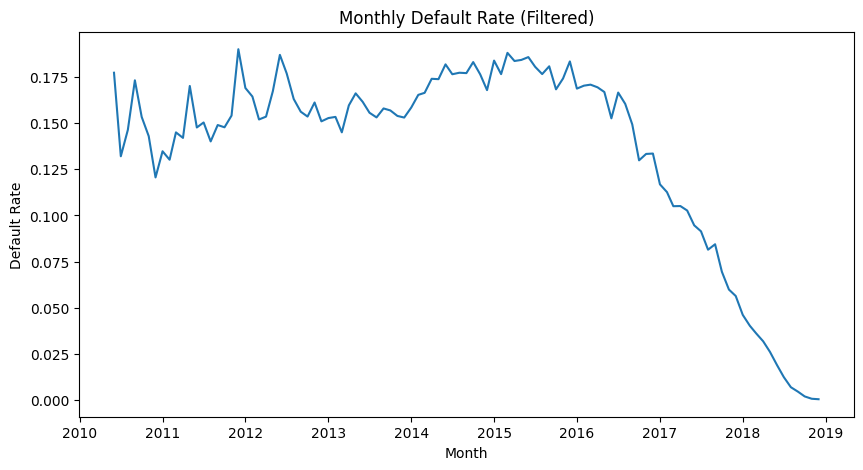

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_data_filtered["month"],
         monthly_data_filtered["default_rate"])
plt.title("Monthly Default Rate (Filtered)")
plt.xlabel("Month")
plt.ylabel("Default Rate")
plt.show()


That curve is not what a contemporaneous macro default rate should look like.

It steadily declines from ~18% to almost 0% by 2018.

That is not “the economy became perfect.”

That is a vintage effect.

Here’s what’s happening:

Loans issued in early years have had enough time to default.
Loans issued in later years have not had enough time to mature and default.

So the later months show artificially low default rates because:

Those loans are still “Current.”

This is called right-censoring.

You are measuring:

“Fraction of loans from issuance month that have defaulted by today.”

Later vintages are incomplete.

So the downward slope is mechanical, not macroeconomic.

This is a very important realization.

If we use this directly in causal modeling, we would falsely conclude:

“Economy improved dramatically.”

But that’s not the mechanism. It’s maturity bias.

You have two options:

Option 1 — Restrict to Fully Matured Loans

Only include loans issued up to, say, 2015 or 2016.

So that every loan has had enough time to default.

This removes right-censoring.

Option 2 — Define Default Within Fixed Horizon

For each loan, define:

Did it default within 12 months of issuance?

That creates a clean fixed-horizon default rate.

This is much more correct statistically.